In [618]:
# Change this to whatever your directory you're working from is - this should be
# the head level with Code and Data directories.
main_path = '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/'

In [649]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
import random as python_random
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from google.colab import files
import sklearn.preprocessing
import scipy
from tensorflow.keras import regularizers

import sys
import importlib
import pickle

# set seeds
np.random.seed(768)
python_random.seed(869)
tf.random.set_seed(1234)

from google.colab import drive
drive.mount('/content/drive')

sys.path.append(main_path+"Code")
import vep_functions
importlib.reload(vep_functions)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<module 'vep_functions' from '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/vep_functions.py'>

In [620]:
# In the generate_full_length_encodings.ipynb, we generated 64 encodings for 
# all canonical human proteins (~20K total) using the method from Alley et al 
# 2019, and this dictionary with keys = protein identifiers and values = numpy
# array of the 64 encodings into a pickle file. Here, we're loading in that 
# pickle dump.
with open(main_path+'Data/protein_full_length_encodings.pickle','rb') as f:
  d_proteins = pickle.load(f)

In [621]:
# Note that the key is what's called a Uniprot identifier - this is a 
# standard protein database with an accepted nomenclature for proteins.
d_proteins['Q8NF67']

array([ -0.24248172,   0.5769009 ,  -0.50422126,  -2.2459831 ,
        -0.7153605 ,   0.36937845,   1.0088396 ,   0.61870915,
         0.22931232,  -0.32420856,   1.5656226 ,   0.7887755 ,
        -0.11435786,   0.3966927 ,  -0.5028342 ,  -0.6472911 ,
       -19.329302  ,   0.04817861,   1.7805336 ,  -1.1326709 ,
        -0.3225029 ,   0.8827996 ,  -1.2294506 ,  -1.2144473 ,
        10.013167  ,  -1.1597188 ,  -0.52761555,   0.05026023,
        -0.8731482 , -38.95915   ,   1.6405944 ,   0.6292187 ,
         1.2038372 ,  -0.62343854,   1.5771168 ,  -0.55369717,
        -0.6339526 ,   2.1165748 ,  -0.40147275,  -1.9928801 ,
         0.04399551,   0.55770665,  -0.1248806 ,   0.78420043,
        -0.40898785,   3.1832213 ,  -8.057479  ,  -4.2546277 ,
         4.3186417 ,   2.1975977 ,   0.76275504,   0.6406878 ,
        -0.5724298 ,  -0.9726351 ,   0.1945777 ,   0.26208588,
        -0.21102697,  -0.08498067,   0.10933054,   2.6604922 ,
        -0.12001674,   0.58957154,   0.814094  ,   0.29

In [660]:
# Here's our model that we're going to be working with
def build_nn_model_3(X,Y,xv,yv):
  # Build our specified model
  model = models.Sequential()

  l2_val = 0.025
  model.add(layers.Dense(50, input_shape=(105,),activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(0.4))
  model.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(0.4))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  # Add in our code to save the 
  #checkpoint = ModelCheckpoint("aa_subs_best_model_epoch{epoch:02d}.ckpt", monitor='val_accuracy', verbose=1,
  #  save_best_only=True, mode='auto', save_freq='epoch')

  nepochs = 250
  history = model.fit(X,
                    Y,
                    epochs=nepochs,
                    batch_size=512,
                    validation_data=(xv,yv),
                    #callbacks=[checkpoint]
                    )

  return model, history

In [661]:
# Now, let's load in and format our clinvar data.
# Now, let's load our train and validate sets
data_dir = main_path+'Data/'
train_file = data_dir+'train_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
test_file = data_dir+'test_processed_clinvar_seqs_with_clusters_clustershuffle.csv'

X_train, X_val, X_test, Y_train, Y_val, Y_test = vep_functions.model_3_process_input_and_output(train_file,val_file,test_file,d_proteins)
print(X_train.shape)
model_shuffle,history_shuffle = build_nn_model_3(X_train,Y_train,X_val,Y_val)

105
The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]
(5006, 105)
Epoch 1/250
10/10 [==============================] - 1s 25ms/step - loss: 3.4756 - categorical_accuracy: 0.4816 - val_loss: 3.1801 - val_categorical_accuracy: 0.5732
Epoch 2/250
10/10 [==============================] - 0s 6ms/step - loss: 3.3634 - categorical_accuracy: 0.5008 - val_loss: 3.0876 - val_categorical_accuracy: 0.6136
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 3.2310 - categorical_accuracy: 0.5202 - val_loss: 3.0042 - val_categorical_accuracy: 0.6288
Epoch 4/250
10/10 [==============================] - 0s 7ms/step - loss: 3.1415 - categorical_accuracy: 0.5284 - val_loss: 2.9259 - val_categorical_accuracy: 0.6540
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 3.0217 - categorical_accuracy: 0.5665 - val_loss: 2.8512 - val_categorical_accuracy: 0.6717
Epoch 6/250
10/10 [==============================] - 0s 6ms/step - loss: 2.9416 - categori

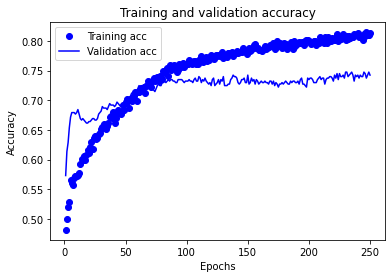

In [662]:
vep_functions.plot_acc(history_shuffle,acc_string='categorical_accuracy')

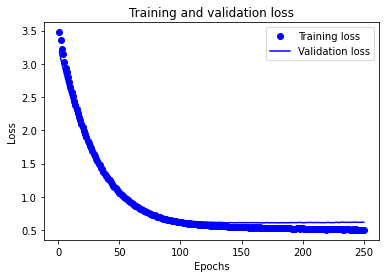

In [663]:
vep_functions.plot_loss(history_shuffle)

In [664]:
# Now, let's try the same model against our train/test split where rows have
# been randomly shuffled (in other words, we will likely have seen some of the 
# sequences in test in the train set, although not the specific mutations)
train_file = data_dir+'train_processed_clinvar_seqs_random.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_random.csv'
test_file = data_dir+'test_processed_clinvar_seqs_random.csv'

X_train, X_val, X_test, Y_train, Y_val, Y_test = vep_functions.model_3_process_input_and_output(train_file,val_file,test_file,d_proteins)
model_random,history_random = build_nn_model_3(X_train,Y_train,X_val,Y_val)

105
The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]
Epoch 1/250
10/10 [==============================] - 1s 24ms/step - loss: 3.4909 - categorical_accuracy: 0.5240 - val_loss: 3.2735 - val_categorical_accuracy: 0.5363
Epoch 2/250
10/10 [==============================] - 0s 7ms/step - loss: 3.4090 - categorical_accuracy: 0.5126 - val_loss: 3.1755 - val_categorical_accuracy: 0.5541
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 3.2876 - categorical_accuracy: 0.5186 - val_loss: 3.0833 - val_categorical_accuracy: 0.5654
Epoch 4/250
10/10 [==============================] - 0s 6ms/step - loss: 3.1928 - categorical_accuracy: 0.5300 - val_loss: 2.9961 - val_categorical_accuracy: 0.5767
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 3.0858 - categorical_accuracy: 0.5411 - val_loss: 2.9140 - val_categorical_accuracy: 0.5945
Epoch 6/250
10/10 [==============================] - 0s 7ms/step - loss: 2.9776 - categorical_accuracy

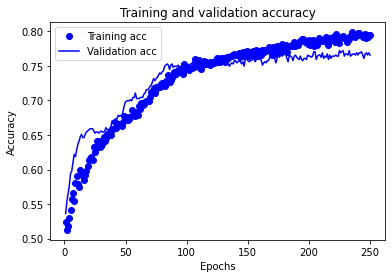

In [665]:
vep_functions.plot_acc(history_random,acc_string='categorical_accuracy')

In [666]:
model_random.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.5463 - categorical_accuracy: 0.7606


[0.5462952852249146, 0.7606111764907837]